<a href="https://colab.research.google.com/github/Shovtenko/sales-data-analysis/blob/main/First%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2-1165465124.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=latest.values, y=latest.index, palette="magma")


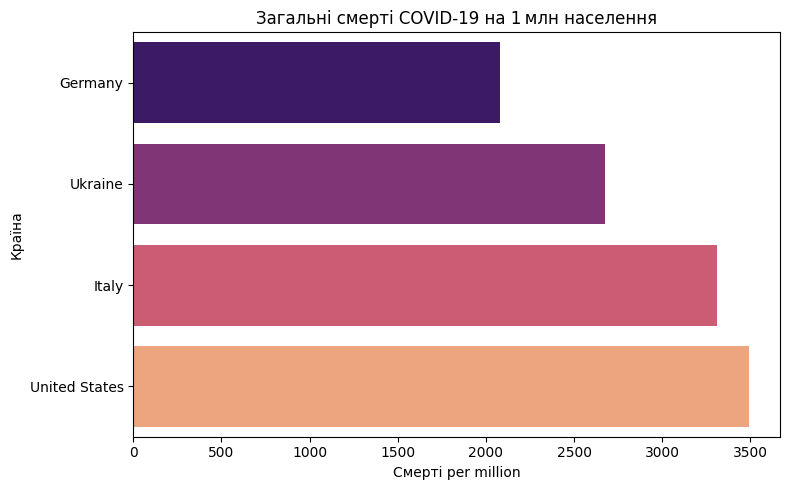

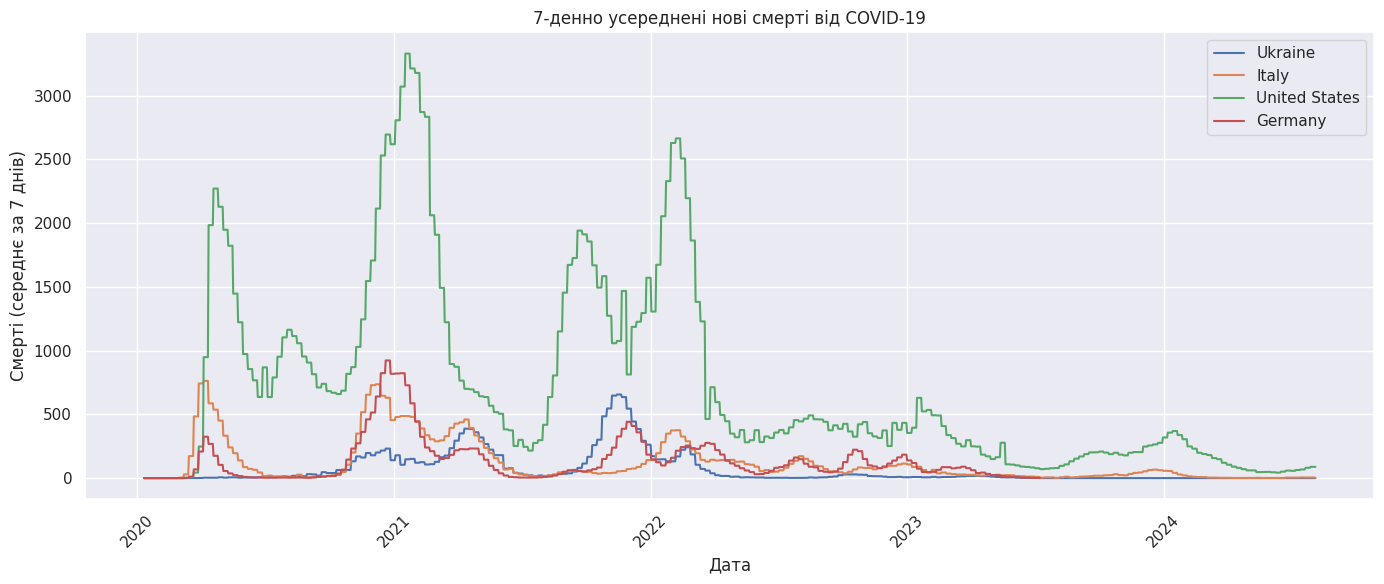

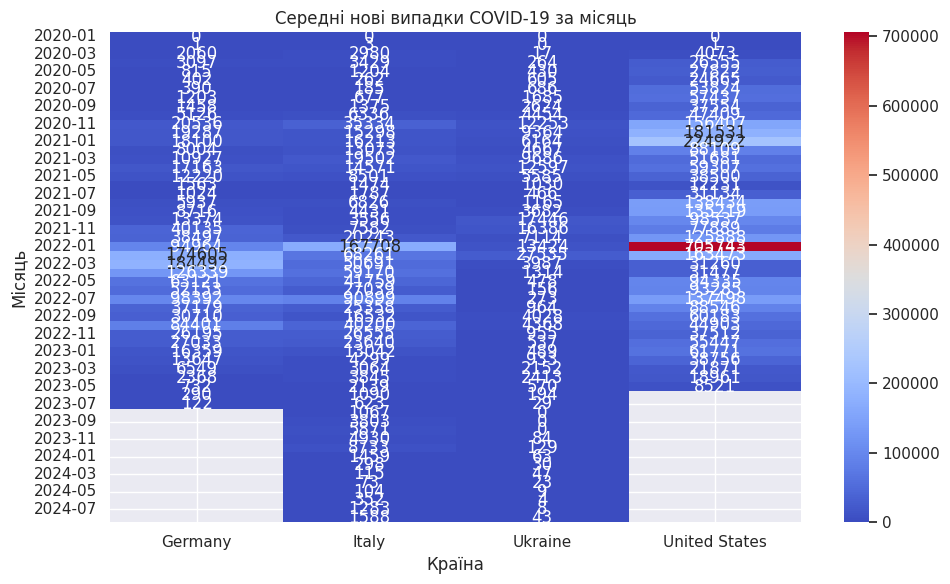

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url, parse_dates=["date"])
countries = ["Ukraine", "Italy", "United States", "Germany"]
df_filtered = df[df["location"].isin(countries)].copy()
df_filtered = df_filtered.set_index(["location", "date"])
latest = df_filtered.groupby("location")["total_deaths_per_million"].last().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=latest.values, y=latest.index, palette="magma")
plt.title("Загальні смерті COVID‑19 на 1 млн населення")
plt.xlabel("Смерті per million")
plt.ylabel("Країна")
plt.tight_layout()
plt.show()
sns.set(style="darkgrid")
plt.figure(figsize=(14, 6))

for country in countries:
    subset = df_filtered.loc[country]["new_deaths"].rolling(7).mean()
    plt.plot(subset.index, subset.values, label=country)

plt.title("7‑денно усереднені нові смерті від COVID‑19")
plt.xlabel("Дата")
plt.ylabel("Смерті (середнє за 7 днів)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_month = df_filtered.groupby([
    "location",
    df_filtered.index.get_level_values("date").to_period("M")
])["new_cases"].mean().unstack("location")

plt.figure(figsize=(10, 6))
sns.heatmap(df_month, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Середні нові випадки COVID‑19 за місяць")
plt.xlabel("Країна")
plt.ylabel("Місяць")
plt.tight_layout()
plt.show()
